In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import xgboost as xgb
import warnings
pd.options.display.max_columns = None

warnings.filterwarnings("ignore")


In [2]:
credit_risk= pd.read_csv("UCI_Credit_Card.csv")

df= credit_risk.copy()
# As we seen Column ID has no meaning here so, we will remove it
df.drop(["ID"], axis=1, inplace= True) #axis=1 -- column removal and inplcae= True --means change in the original data



In [3]:
# Independnet features
X = df.drop(['default.payment.next.month'], axis=1)
# Dependent feature
y = df['default.payment.next.month']


In [4]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
X= scaler.fit_transform(X)


In [5]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.20,random_state=42)


In [6]:
!pip install -U scikit-learn imbalanced-learn


In [7]:
from imblearn.over_sampling import SMOTE
from collections import Counter
# summarize class distribution
print("Before oversampling: ",Counter(y_train))



Before oversampling:  Counter({0: 18677, 1: 5323})


In [8]:
# define oversampling strategy
SMOTE= SMOTE()



In [9]:
# fit and apply the transform
X_train,y_train= SMOTE.fit_resample(X_train,y_train)



In [10]:
# summarize class distribution
print("After oversampling: ",Counter(y_train))


After oversampling:  Counter({0: 18677, 1: 18677})


# LOGISTIC REGRESSION

In [11]:
from sklearn.linear_model import LogisticRegression
logit= LogisticRegression()
logit.fit(X_train, y_train)
# Predicting the model
pred_logit= logit.predict(X_test)



In [ ]:
!pip install --upgrade scikit-learn


The accuracy of logit model is: 0.6843333333333333
              precision    recall  f1-score   support

           0       0.88      0.69      0.77      4687
           1       0.37      0.66      0.48      1313

    accuracy                           0.68      6000
   macro avg       0.63      0.68      0.63      6000
weighted avg       0.77      0.68      0.71      6000



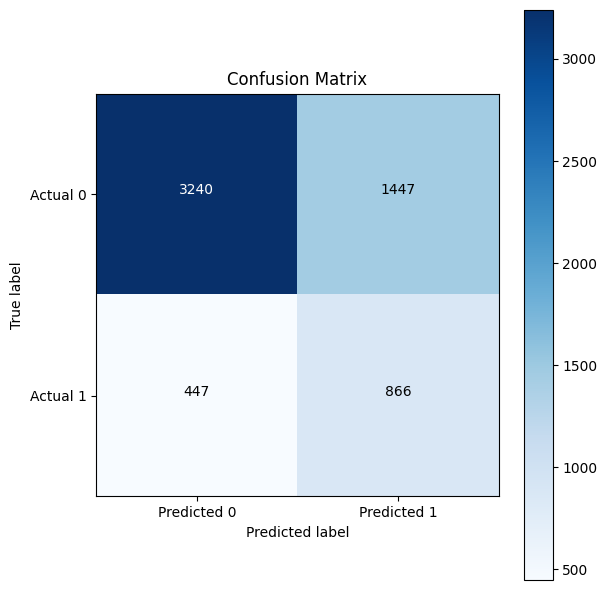

In [18]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt

print("The accuracy of logit model is:", accuracy_score(y_test, pred_logit))
print(classification_report(y_test, pred_logit))

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, pred_logit)

# Plot the confusion matrix
plt.figure(figsize=(6, 6))
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.colorbar()
tick_marks = [0, 1]
plt.xticks(tick_marks, ["Predicted 0", "Predicted 1"])
plt.yticks(tick_marks, ["Actual 0", "Actual 1"])

thresh = conf_matrix.max() / 2.
for i, j in [(0, 0), (0, 1), (1, 0), (1, 1)]:
    plt.text(j, i, format(conf_matrix[i, j], 'd'),
             horizontalalignment="center",
             color="white" if conf_matrix[i, j] > thresh else "black")

plt.tight_layout()
plt.ylabel("True label")
plt.xlabel("Predicted label")
plt.show()





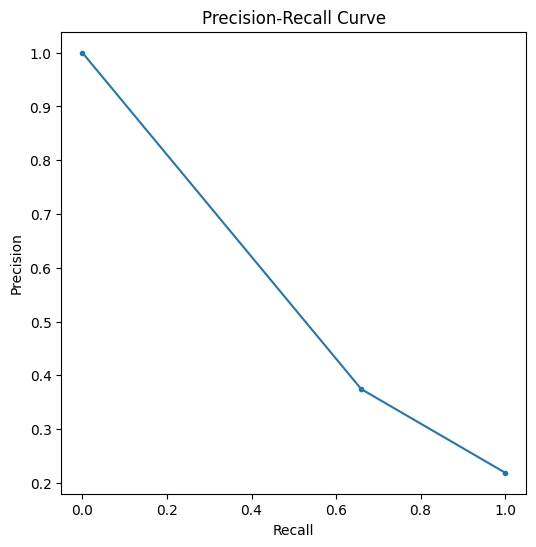

In [20]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

# Calculate precision and recall values
precision, recall, _ = precision_recall_curve(y_test, pred_logit)

# Plot the precision-recall curve
plt.figure(figsize=(6, 6))
plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()



# RANDOM FOREST CLASSIFIER

The accuracy of Random Forest Classifier is: 0.7958333333333333
              precision    recall  f1-score   support

           0       0.86      0.89      0.87      4687
           1       0.54      0.46      0.50      1313

    accuracy                           0.80      6000
   macro avg       0.70      0.68      0.68      6000
weighted avg       0.79      0.80      0.79      6000



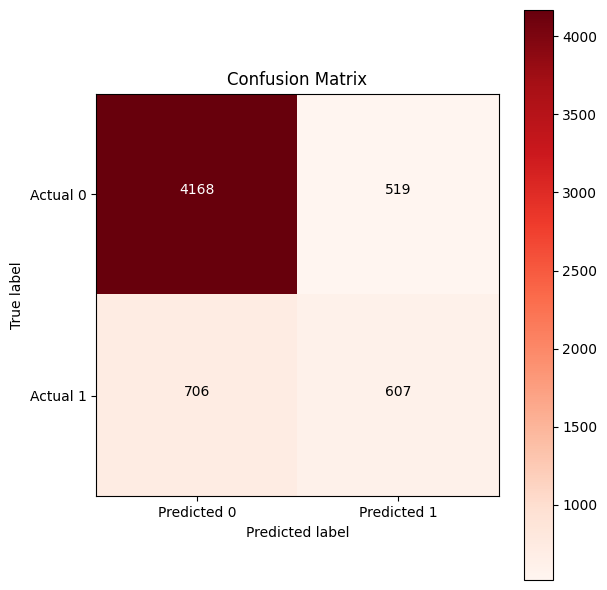

In [25]:
from sklearn.ensemble import RandomForestClassifier
rf= RandomForestClassifier()
# Fitting the model
rf.fit(X_train,y_train)
# Predicting the model
pred_rf= rf.predict(X_test)
print("The accuracy of Random Forest Classifier is:", accuracy_score(y_test, pred_rf))
print(classification_report(y_test,pred_rf ))


# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, pred_rf)

# Plot the confusion matrix
plt.figure(figsize=(6, 6))
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Reds)
plt.title("Confusion Matrix")
plt.colorbar()
tick_marks = [0, 1]
plt.xticks(tick_marks, ["Predicted 0", "Predicted 1"])
plt.yticks(tick_marks, ["Actual 0", "Actual 1"])

thresh = conf_matrix.max() / 2.
for i, j in [(0, 0), (0, 1), (1, 0), (1, 1)]:
    plt.text(j, i, format(conf_matrix[i, j], 'd'),
             horizontalalignment="center",
             color="white" if conf_matrix[i, j] > thresh else "black")

plt.tight_layout()
plt.ylabel("True label")
plt.xlabel("Predicted label")
plt.show()



# X GBOOST

The accuracy of XGB Classifier model is: 0.8025
              precision    recall  f1-score   support

           0       0.85      0.91      0.88      4687
           1       0.57      0.42      0.48      1313

    accuracy                           0.80      6000
   macro avg       0.71      0.67      0.68      6000
weighted avg       0.79      0.80      0.79      6000



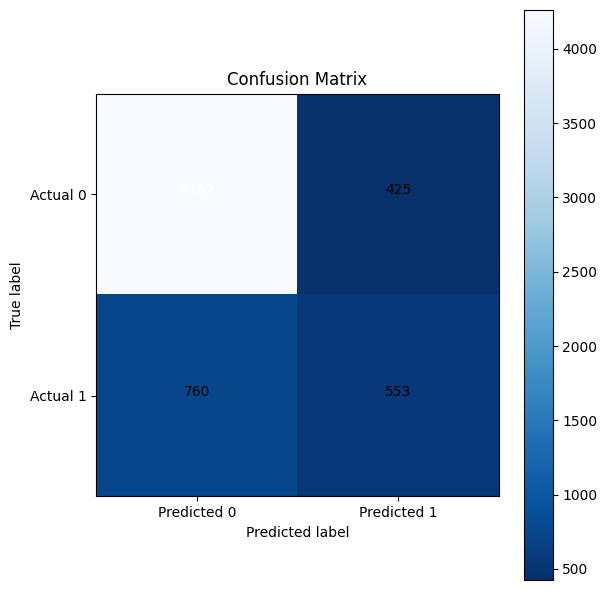

In [27]:
xgb_clf= xgb.XGBClassifier()
#fitting the model
xgb_clf.fit(X_train,y_train)
## Predicting the model
xgb_predict= xgb_clf.predict(X_test)
print("The accuracy of XGB Classifier model is:", accuracy_score(y_test, xgb_predict))
print(classification_report(y_test,xgb_predict ))
# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, xgb_predict)

# Plot the confusion matrix
plt.figure(figsize=(6, 6))
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues_r)
plt.title("Confusion Matrix")
plt.colorbar()
tick_marks = [0, 1]
plt.xticks(tick_marks, ["Predicted 0", "Predicted 1"])
plt.yticks(tick_marks, ["Actual 0", "Actual 1"])

thresh = conf_matrix.max() / 2.
for i, j in [(0, 0), (0, 1), (1, 0), (1, 1)]:
    plt.text(j, i, format(conf_matrix[i, j], 'd'),
             horizontalalignment="center",
             color="white" if conf_matrix[i, j] > thresh else "black")

plt.tight_layout()
plt.ylabel("True label")
plt.xlabel("Predicted label")
plt.show()


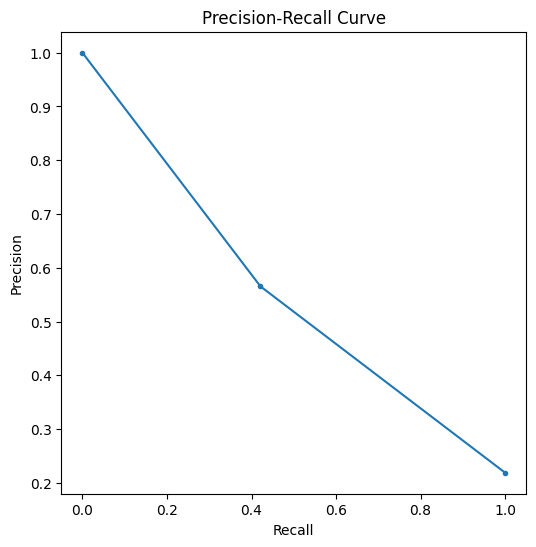

In [30]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

# Calculate precision and recall values
precision, recall, _ = precision_recall_curve(y_test, xgb_predict)

# Plot the precision-recall curve
plt.figure(figsize=(6, 6))
plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()



# HYPER PARAMETER TUNING

In [31]:
params={
 "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "reg_lambda"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "subsample"            : [ 0.3, 0.4, 0.5 , 0.7, 0.9 , 1.1, 1.3 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]

}
## Hyperparameter optimization using RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV
random_search=RandomizedSearchCV(xgb_clf,param_distributions=params,n_iter=5,scoring='roc_auc',n_jobs=-1,cv=5,verbose=3)
print("fitting the RandomizedSearchCV")
random_search.fit(X_train,y_train)
# Finding the best estimators
print(random_search.best_estimator_)
# Finding the best param
print(random_search.best_params_)
classifierXGB=xgb.XGBClassifier(objective='binary:logistic',
                                  gamma=random_search.best_params_['gamma'],
                                  learning_rate=random_search.best_params_['learning_rate'],
                                  max_depth=random_search.best_params_['max_depth'],
                                  reg_lambda=random_search.best_params_['reg_lambda'],
                                  min_child_weight=random_search.best_params_['min_child_weight'],
                                  subsample=random_search.best_params_['subsample'],
                                  colsample_bytree=random_search.best_params_['colsample_bytree'],
                                  use_label_encoder=False)






fitting the RandomizedSearchCV
Fitting 5 folds for each of 5 candidates, totalling 25 fits
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.3, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.3, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.25, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=8, max_leaves=None,
              min_child_weight=7, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)
{'subsample': 0.4, 'reg_lambda': 12, 'min_child_weight': 7, 'max_depth': 8, 'learning_rate': 0.25, 'gamma': 0.3, 'colsample_bytree': 0.3}


In [32]:
# Fitting the model
classifierXGB.fit(X_train,y_train)
# Predicting model
y_pred= classifierXGB.predict(X_test)

from sklearn.model_selection import cross_val_score
score=cross_val_score(classifierXGB,X,y,cv=10)
print(f"\n\nCross-Validation Scores : {score}")
print(f"Mean of the scores:{score.mean()}")




Cross-Validation Scores : [0.8        0.809      0.81       0.80533333 0.811      0.82533333
 0.82833333 0.82066667 0.82566667 0.821     ]
Mean of the scores:0.8156333333333334
